In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
%matplotlib inline

boston = load_boston()
print(boston.data.shape)

(506, 13)


MSE: 6.5951


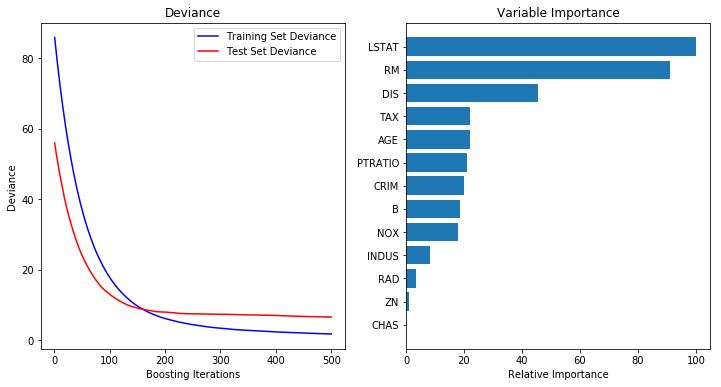

In [204]:

X, y = shuffle(boston.data, boston.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [205]:
data = pd.read_csv('train.csv')
data.shape

(10000, 20)

In [206]:
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [207]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [208]:
data[['Id', 'DistrictId', 'Rooms', 'Square', 'Price']].loc[data['Rooms']<=0.0]

,Id,DistrictId,Rooms,Square,Price
1397,12638,27,0.0,138.427694,268394.744389
1981,7917,27,0.0,212.932361,302211.260887
2269,7317,27,0.0,41.790881,98129.976788
3911,770,28,0.0,49.483501,217009.338463
4366,456,6,0.0,81.491446,212864.799112
4853,3224,27,0.0,2.377248,126596.941798
6149,3159,88,0.0,38.697117,158998.110646
8834,9443,27,0.0,87.762616,219281.918007


In [214]:
data.drop(data[data.Rooms ==0.0].index, inplace=True)
data[['Id', 'DistrictId', 'Rooms', 'Square', 'Price']].loc[data['Rooms']<=0.0]

,Id,DistrictId,Rooms,Square,Price


In [215]:
data[['Id', 'DistrictId', 'Rooms', 'Square', 'Price']].loc[(data['Square']/data['Rooms']) < 9.0]

,Id,DistrictId,Rooms,Square,Price
212,1748,88,2.0,5.497061,412511.088764
377,5927,57,10.0,59.056975,317265.323792
1316,11526,27,1.0,4.633498,107604.269441
1454,8491,1,19.0,42.006046,78364.616704
1608,10202,6,1.0,2.596351,137597.601458
3271,6358,27,5.0,42.003293,112693.641769
3280,10527,27,1.0,4.380726,97560.720383
3413,9487,5,1.0,5.129222,369472.403061
4431,7594,53,5.0,39.906082,206148.845716
4739,12676,81,3.0,13.784865,78388.806186


In [217]:
data.drop(data[data['Square']/data['Rooms'] < 9.0].index, inplace=True)
data[['Id', 'DistrictId', 'Rooms', 'Square', 'Price']].loc[(data['Square']/data['Rooms']) < 9.0]

,Id,DistrictId,Rooms,Square,Price


In [232]:
data[['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Price']].\
    loc[data['LifeSquare'] + data['KitchenSquare'] > data['Square']].shape

(832, 7)

In [240]:
data.groupby(['Rooms']).count()

,Id,DistrictId,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,mean Kitch
Rooms,,,,,,,,,,,,,,,,,,,,
1.0,3697,3697,3697,2819,3697,3697,3697,3697,3697,3697,3697,3697,3697,3697,1801,3697,3697,3697,3697,3697
2.0,3878,3878,3878,3051,3878,3878,3878,3878,3878,3878,3878,3878,3878,3878,2105,3878,3878,3878,3878,3878
3.0,2231,2231,2231,1838,2231,2231,2231,2231,2231,2231,2231,2231,2231,2231,1191,2231,2231,2231,2231,2231
4.0,150,150,150,141,150,150,150,150,150,150,150,150,150,150,86,150,150,150,150,150
5.0,16,16,16,15,16,16,16,16,16,16,16,16,16,16,9,16,16,16,16,16
6.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
